In [1]:
%matplotlib inline
import pandas as pd
from os.path import join
from os import walk, listdir
from collections import defaultdict
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pd.set_option("display.max_rows", 20)

%cd C:/Users/wesle/OneDrive/College/Graeber Lab/Genomic_instability/Winter_2017/Thres_0.2_GSEA

C:\Users\wesle\OneDrive\College\Graeber Lab\Genomic_instability\Winter_2017\Thres_0.2_GSEA


In [2]:
WD = 'C:/Users/wesle/OneDrive/College/Graeber Lab/Genomic_instability/Winter_2017/Thres_0.2_GSEA/'
GSEA_DIR = [x[1] for x in walk(WD)][0]
GSEA_DIR

['my_analysis_BKPT_CORE1.GseaPreranked.1490308521179',
 'my_analysis_BKPT_CORE2.GseaPreranked.1490308515605',
 'my_analysis_BRCA_18q_loss.Gsea.1485162750819',
 'my_analysis_BRCA_1q_gain.Gsea.1485161112665',
 'my_analysis_BRCA_3_loss.Gsea.1485161020010',
 'my_analysis_BRCA_5q_gain.Gsea.1486529903187',
 'my_analysis_BRCA_6q_gain.Gsea.1485162806106',
 'my_analysis_BRCA_6q_loss.Gsea.1485160035043',
 'my_analysis_BRCA_8p_loss.Gsea.1485161043026',
 'my_analysis_BRCA_8q_gain.Gsea.1485161060694',
 'my_analysis_BRCA_9p_loss.Gsea.1485161007838',
 'my_analysis_ICNA_CORE1.GseaPreranked.1490308493201',
 'my_analysis_ICNA_CORE2.GseaPreranked.1490308499576',
 'my_analysis_SKCM_18q_loss.Gsea.1485163937477',
 'my_analysis_SKCM_1q_gain.Gsea.1485162834098',
 'my_analysis_SKCM_3_loss.Gsea.1485162853932',
 'my_analysis_SKCM_5q_gain.Gsea.1486529916997',
 'my_analysis_SKCM_6p_gain.Gsea.1485164033703',
 'my_analysis_SKCM_6q_loss.Gsea.1485162916220',
 'my_analysis_SKCM_8p_loss.Gsea.1485163902099',
 'my_analysi

In [3]:
all_cancers_cnv = pd.read_excel("All_cancers_CNV_NES_Score.xlsx", index_col=0)
cancer_groups = defaultdict(list)
cnv_groups = defaultdict(list)
cancer_columns = all_cancers_cnv.columns.tolist()
cancer_types = set(x.split("-")[0] for x in cancer_columns)
cnv_types = set("-".join(x.split("-")[1:]) for x in cancer_columns)
cancer_types
cnv_types

{'18q-loss',
 '1q-gain',
 '3-loss',
 '5q-gain',
 '6p-gain',
 '6q-loss',
 '8p-loss',
 '8q-gain',
 '9p-loss',
 'BKPT-CORE1',
 'BKPT-CORE2',
 'ICNA-CORE1',
 'ICNA-CORE2'}

In [4]:
def dict_map(dict_, keys, list_items):
    for k in keys:
        k_items = list(filter(lambda x: k in x, list_items))
        dict_[k] = k_items
    return dict_

In [5]:
cancer_groups = dict_map(cancer_groups, cancer_types, cancer_columns)
cnv_groups = dict_map(cnv_groups, cnv_types, cancer_columns)
cnv_groups

defaultdict(list,
            {'18q-loss': ['BRCA-18q-loss', 'SKCM-18q-loss', 'UVM-18q-loss'],
             '1q-gain': ['BRCA-1q-gain', 'SKCM-1q-gain', 'UVM-1q-gain'],
             '3-loss': ['BRCA-3-loss', 'SKCM-3-loss', 'UVM-3-loss'],
             '5q-gain': ['BRCA-5q-gain', 'SKCM-5q-gain', 'UVM-5q-gain'],
             '6p-gain': ['BRCA-6p-gain', 'SKCM-6p-gain', 'UVM-6p-gain'],
             '6q-loss': ['BRCA-6q-loss', 'SKCM-6q-loss', 'UVM-6q-loss'],
             '8p-loss': ['BRCA-8p-loss', 'SKCM-8p-loss', 'UVM-8p-loss'],
             '8q-gain': ['BRCA-8q-gain', 'SKCM-8q-gain', 'UVM-8q-gain'],
             '9p-loss': ['BRCA-9p-loss', 'SKCM-9p-loss', 'UVM-9p-loss'],
             'BKPT-CORE1': ['CORE1-BKPT-CORE1'],
             'BKPT-CORE2': ['CORE2-BKPT-CORE2'],
             'ICNA-CORE1': ['CORE1-ICNA-CORE1'],
             'ICNA-CORE2': ['CORE2-ICNA-CORE2']})

In [6]:
def geneset_overlap_cancers(wd):
    gsea_dir = [x[1] for x in walk(wd)][0]
    all_cancer_cnv = pd.DataFrame()
    for i in range(len(gsea_dir)):
        cancer_cnv = '-'.join((gsea_dir[i].split('.')[0]).split('_')[2:])
        na_pos = ''
        na_neg = ''
        files_i = listdir(join(wd, gsea_dir[i]))
        wd_i = wd + gsea_dir[i]
        for f in files_i:
            if ("gsea_report_for_YES" in f or "gsea_report_for_na_pos" in f) and (".xls" in f):
                na_pos = f
            if ("gsea_report_for_NO" in f or "gsea_report_for_na_neg" in f) and (".xls" in f):
                na_neg = f
        df1 = pd.read_table(join(wd_i, na_pos), index_col=0)
        df2 = pd.read_table(join(wd_i, na_neg), index_col=0)
        df_i = pd.concat([df1, df2])
        # print(df_i['NES'])
        if (len(all_cancer_cnv.index)):
            all_cancer_cnv[cancer_cnv] = df_i['NES']
        else:
            all_cancer_cnv = pd.DataFrame(index=df_i.index)  
            all_cancer_cnv[cancer_cnv] = df_i['NES']
    # all_cancer_cnv.head()
    return all_cancer_cnv

In [7]:
all_cancer_cnv = geneset_overlap_cancers(WD)
all_cancer_cnv.columns
np.all(all_cancer_cnv["BRCA-5q-gain"] != np.nan)
all_cancer_cnv.to_excel(WD+"All_cancers_CNV_NES_Score__.xlsx")

In [14]:
# loading the data
all_cancers_cnv = pd.read_excel(WD+"All_cancers_CNV_NES_Score__.xlsx", index_col = 0, na_values=0)
all_cancers_cnv.head()

,BKPT-CORE1,BKPT-CORE2,BRCA-18q-loss,BRCA-1q-gain,BRCA-3-loss,BRCA-5q-gain,BRCA-6q-gain,BRCA-6q-loss,BRCA-8p-loss,BRCA-8q-gain,...,SKCM-9p-loss,UVM-18q-loss,UVM-1q-gain,UVM-3-loss,UVM-5q-gain,UVM-6p-gain,UVM-6q-loss,UVM-8p-loss,UVM-8q-gain,UVM-9p-loss
NAME,,,,,,,,,,,,,,,,,,,,,
REACTOME_DNA_REPLICATION,3.851666,2.936207,2.074622,1.694019,1.717907,0.802626,2.153249,0.753963,1.999012,2.250175,...,-0.917094,-0.742689,0.977891,1.565459,-0.708245,-1.103086,1.261652,1.208848,0.986936,-0.836578
REACTOME_MITOTIC_M_M_G1_PHASES,3.737821,2.808506,2.074693,1.652025,1.656173,0.766315,2.123906,0.661707,2.003650,2.271612,...,-0.967938,-0.814286,1.038598,1.573884,-0.713071,-1.095478,1.241473,1.242824,0.993845,-0.829262
REACTOME_CELL_CYCLE_MITOTIC,3.710160,2.904587,1.810346,1.593980,1.652680,0.914997,2.098447,0.824911,1.921690,2.223563,...,-0.953440,-0.712193,0.999268,1.487552,-0.650107,-0.991520,1.094855,1.084037,0.988767,-0.835948
REACTOME_CELL_CYCLE,3.702091,2.772370,1.943103,1.649298,1.657351,0.930743,2.041116,1.333571,2.032968,2.294861,...,-0.943239,-0.936619,1.041949,1.376301,-0.744996,-0.824154,1.267587,1.064341,1.120562,-0.796664
REACTOME_CELL_CYCLE_CHECKPOINTS,3.521164,2.237758,1.854227,1.372519,1.606202,0.944640,1.902379,0.596001,2.059232,2.169343,...,-0.822806,-0.763053,0.759250,1.533308,-0.821339,-1.118153,1.495903,1.376446,1.083998,-0.771722


In [59]:
columns = all_cancers_cnv.columns.tolist()
cancers = [x.split("-")[0] for x in columns]
cnvs = ["-".join(x.split("-")[1:]) for x in columns]
cancer_list = [list(filter(lambda x : y in x, columns)) for y in cancers]
cnv_list = [list(filter(lambda x : y in x, columns)) for y in cnvs]
group_by_cancers = dict(zip(cancers, cancer_list))
group_by_cnv = dict(zip(cnvs, cnv_list))
cancer_groups = pd.MultiIndex.from_tuples([(k, v) for k in group_by_cancers for v in group_by_cancers[k]])
cnv_groups = pd.MultiIndex.from_tuples([(k, v) for k in group_by_cnv for v in group_by_cnv[k]])
cnv_groupby_cancers = all_cancer_cnv
cnv_groupby_cancers.columns = cancer_groups
cnv_groupby_cnvs = all_cancer_cnv
cnv_groupby_cnvs.columns = cnv_groups

In [25]:
# calculate variance by CNV types
variance_groupby_cnv = pd.DataFrame(index=cnv_groupby_cnvs.index)
cols_groupby_cnv = set([column[0] for column in cnv_groupby_cnvs])
for col in cols_groupby_cnv:
    variance_groupby_cnv[col + "-mean"] = cnv_groupby_cnvs[col].mean(axis=1)
    variance_groupby_cnv[col + "-std"] = cnv_groupby_cnvs[col].std(axis=1)
variance_groupby_cnv.to_excel(WD+"variance_groupby_cnv.xlsx")

In [37]:
# Sort the values of means and variance to see the important gene sets
bool_lists_for_sort = ["variance" in x for x in variance_groupby_cnv.columns.tolist()]
variance_groupby_cnv.sort_values(by=variance_groupby_cnv.columns.tolist(), ascending=bool_lists_for_sort, inplace=True)
variance_groupby_cnv.to_excel(WD+"variance_groupby_cnv.xlsx")

In [36]:
variance_groupby_cnv

,18q-loss-mean,18q-loss-std,9p-loss-mean,9p-loss-std,5q-gain-mean,5q-gain-std,CORE1-mean,CORE1-std,1q-gain-mean,1q-gain-std,...,8q-gain-mean,8q-gain-std,3-loss-mean,3-loss-std,6p-gain-mean,6p-gain-std,CORE2-mean,CORE2-std,8p-loss-mean,8p-loss-std
NAME,,,,,,,,,,,,,,,,,,,,,
REACTOME_DNA_REPLICATION,2.954165,0.888658,-0.327839,0.844918,0.600220,1.199526,1.453606,0.989444,-0.183226,1.266779,...,0.356326,1.315840,2.043656,0.188211,0.453069,1.122365,-0.871372,0.096446,1.930716,2.660424
REACTOME_MITOTIC_M_M_G1_PHASES,2.873673,0.833477,-0.342731,0.874925,0.599399,1.253200,1.392807,1.033931,-0.189025,1.253516,...,0.359269,1.323045,2.051836,0.200083,0.469136,1.131315,-0.901911,0.097032,1.866700,2.627416
REACTOME_CELL_CYCLE_MITOTIC,2.808364,0.953555,-0.245505,0.877531,0.591542,1.155162,1.461679,0.900526,-0.182258,1.119108,...,0.373493,1.346367,1.972637,0.229730,0.412285,1.082051,-0.766229,0.041779,1.856521,2.579523
REACTOME_CELL_CYCLE,2.805855,0.879972,0.137456,0.938075,0.493877,1.250075,1.687343,0.500310,-0.100521,1.185478,...,0.453640,1.480485,2.066136,0.214077,0.462746,1.091044,0.747169,0.004471,1.895656,2.514290
REACTOME_MITOTIC_PROMETAPHASE,2.713341,0.690562,-0.162491,1.070181,0.606967,1.248232,1.492050,0.920555,-0.159472,1.061721,...,0.350819,1.300700,1.884996,0.299917,0.403048,1.033275,-0.625408,0.303398,1.654685,2.648802
REACTOME_G2_M_CHECKPOINTS,2.593616,0.858003,-0.186280,0.605463,0.264609,0.956170,1.350856,0.943773,0.452358,1.115019,...,0.400689,1.556727,1.790341,0.251745,0.228387,1.315190,0.212897,0.932421,1.784060,2.331631
REACTOME_DNA_STRAND_ELONGATION,2.563153,0.692027,-0.193252,0.723607,-0.135538,0.973461,1.587721,0.490811,0.890198,0.563496,...,0.475415,1.481653,1.789375,0.169217,-0.096388,1.435241,0.746235,0.080395,1.804198,2.229005
REACTOME_ACTIVATION_OF_ATR_IN_RESPONSE_TO_REPLICATION_STRESS,2.559554,0.714638,-0.510944,0.088415,0.168704,0.921938,1.391099,0.841087,0.469386,1.082896,...,0.427594,1.630611,1.857586,0.205189,-0.290699,1.235165,0.749396,0.250426,1.787081,2.196051
REACTOME_SYNTHESIS_OF_DNA,2.555080,0.781023,-0.971746,0.093364,0.951627,0.604527,1.302119,0.799257,-0.195922,1.395908,...,0.239868,1.199532,1.996873,0.102243,0.550293,1.126242,-1.115325,0.242897,1.740989,2.157411


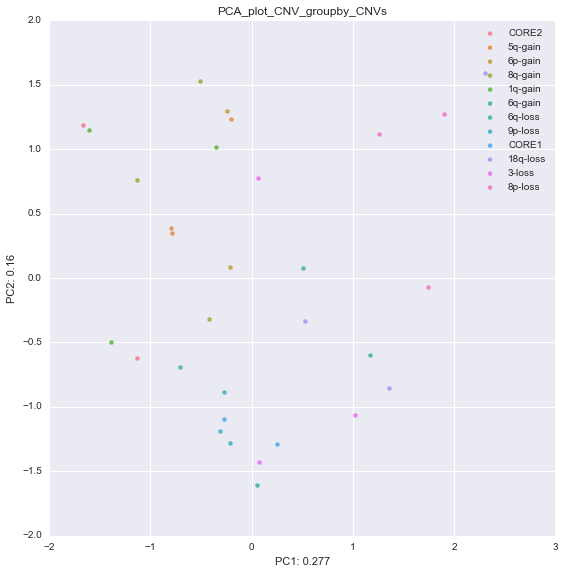

In [66]:
# PCA plot
df = cnv_groupby_cnvs.T.fillna(0)
pca = PCA(n_components=4, whiten=True)
transf = pca.fit_transform(df)
variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_
colName = [index[0] for index in df.index]
bar = pd.DataFrame(list(zip(transf[:, 0], transf[:, 1], colName)), columns=["PC1", "PC2", "Class"])
sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False, legend=False, size=8)
plt.xlabel("PC1: " + str(round(variance_ratio[0], 3)))
plt.ylabel("PC2: " + str(round(variance_ratio[1], 3)))
plt.legend(loc='best')
plt.title("PCA_plot_CNV_groupby_CNVs")
plt.savefig(WD+"PCA_plot_CNV_groupby_CNVs.jpg", bbox_inches='tight')
PCA_loadings = pd.DataFrame(loadings, index=["PC1", "PC2", "PC3", "PC4"], columns=df.columns.tolist())
PCA_loadings.to_csv(WD+"PCA_loadings_CNV_groupby_CNVs.txt", sep="\t")
# pca_norma = PCA(n_components=4, whiten=True)

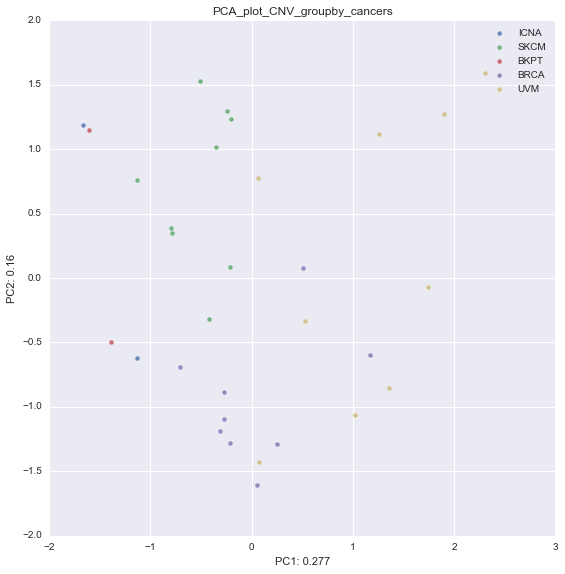

In [66]:
# cnv_groups
cnv_groupby_cancers.columns = cancer_groups
df = cnv_groupby_cancers.T.fillna(0)
pca = PCA(n_components=4, whiten=True)
transf = pca.fit_transform(df)
variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_
colName = [index[0] for index in df.index]
bar = pd.DataFrame(list(zip(transf[:, 0], transf[:, 1], colName)), columns=["PC1", "PC2", "Class"])
sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False, legend=False, size=8)
plt.xlabel("PC1: " + str(round(variance_ratio[0], 3)))
plt.ylabel("PC2: " + str(round(variance_ratio[1], 3)))
plt.legend(loc='best')
plt.title("PCA_plot_CNV_groupby_cancers")
plt.savefig(WD+"PCA_plot_CNV_groupby_CNVs.jpg", bbox_inches='tight')
PCA_loadings = pd.DataFrame(loadings, index=["PC1", "PC2", "PC3", "PC4"], columns=df.columns.tolist())
PCA_loadings.to_csv(WD+"PCA_loadings_CNV_groupby_cancers.txt", sep="\t")

In [12]:
# Correlation plot based on group by cancer and by cnv type

In [64]:
bar.head()

,PC1,PC2,Class
0,-1.664538,1.187795,ICNA
1,-1.134043,-0.617594,ICNA
2,-0.205332,1.233268,SKCM
3,-0.789892,0.345876,SKCM
4,-0.791960,0.386296,SKCM
